# 尼日利亚观众音乐品味的聚类分析

In [1]:
# 数据分析常用库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 去除警告
import warnings
warnings.filterwarnings('ignore')

# 读取数据
data = pd.read_csv('nigerian-songs.csv')
data

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


In [2]:
# 查看数据的基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

歌曲名称、专辑、艺术家、艺术家顶级流派、发行日期、长度、流行度、舞蹈性、音乐性、能量、乐器性、活跃度、响度、语速、节奏和时值  
**各列都是530，均不存在空值，故无需进行缺失值处理。数据类型见Dtype。通过观察，这是一个比较规整的数据集，无需进行缺失值等处理。**


In [3]:
# 替换列名称，便于理解
# 原始列名: ['name', 'album', 'artist', 'artist_top_genre', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']
data.columns = ['歌曲名称', '专辑', '歌手', '歌手主要流派', '发行日期', '时长', '流行度', '舞蹈性', '声学性', '能量值', '器乐性', '现场感', '响度(dB)', '语音性/说唱成分', '节拍速度(BPM)', '拍号']
# 查看数据的前5行
data

,歌曲名称,专辑,歌手,歌手主要流派,发行日期,时长,流行度,舞蹈性,声学性,能量值,器乐性,现场感,响度(dB),语音性/说唱成分,节拍速度(BPM),拍号
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


In [4]:
data.nunique()

歌曲名称         497
专辑           428
歌手           171
歌手主要流派        19
发行日期          20
时长           518
流行度           66
舞蹈性          304
声学性          406
能量值          329
器乐性          294
现场感          362
响度(dB)       504
语音性/说唱成分     386
节拍速度(BPM)    514
拍号             3
dtype: int64

In [ ]:
# 提取和音乐构成相关的特征列-非人工评分，如'舞蹈性', '声学性', '能量值', '器乐性', '现场感'（这里我是想使用纯歌曲本身的特性，而非感官体验得到的特性）
music_features = data[['响度(dB)', '语音性/说唱成分', '节拍速度(BPM)', '拍号']]  # 音乐构成相关特征

# # 或使用提取和音乐感官体验相关的特征列-人工评分，如'舞蹈性', '声学性', '能量值', '器乐性', '现场感'
# music_experience = data[['舞蹈性', '声学性', '能量值', '器乐性', '现场感']]  #音乐体验相关特征

In [ ]:
# 归一化处理
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
music_features = scaler.fit_transform(music_features)
# music_experience = scaler.fit_transform(music_experience)

# 音乐构成特征聚类 --> 歌曲技法聚类

In [7]:
music_features

array([[0.6349278 , 0.11332785, 0.494207  , 1.        ],
       [0.68802647, 0.68325792, 0.47326626, 0.        ],
       [0.61346771, 0.03002879, 0.47334941, 0.5       ],
       ...,
       [0.77316486, 0.0802139 , 0.41135179, 0.5       ],
       [0.64254914, 0.42410531, 0.43171739, 0.5       ],
       [0.86030886, 0.22871246, 0.31374383, 0.5       ]])

## KMenas聚类

### 寻找最佳聚类数K

  File "d:\Anaconda_24\envs\all_can_cpu\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "d:\Anaconda_24\envs\all_can_cpu\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "d:\Anaconda_24\envs\all_can_cpu\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Anaconda_24\envs\all_can_cpu\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


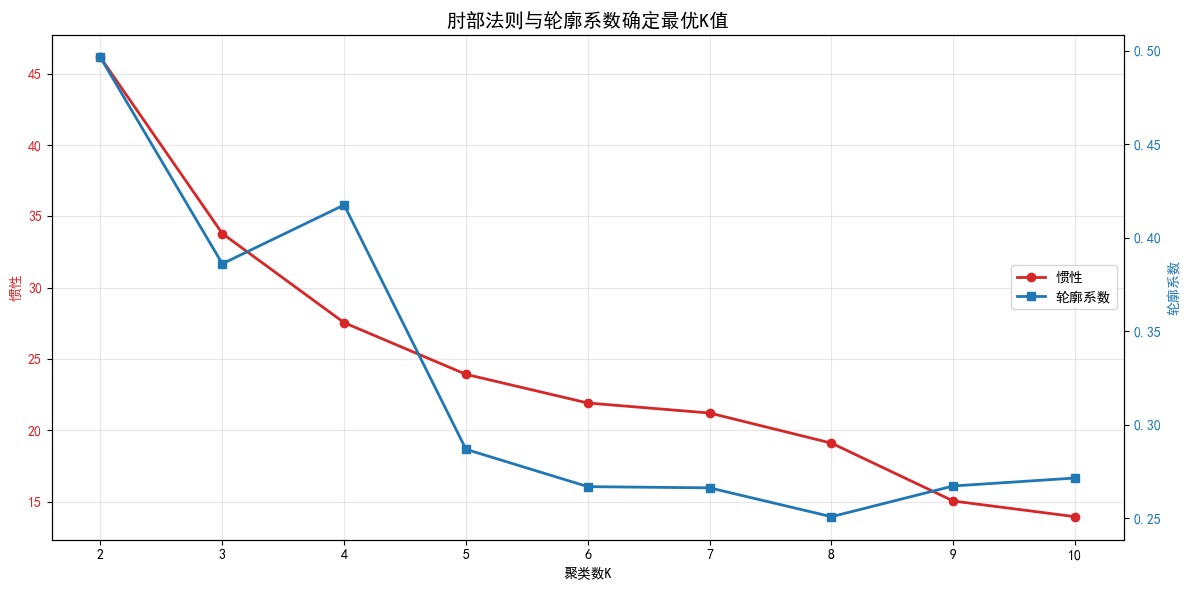

K值分析结果：
K	惯性		轮廓系数
------------------------------
2	46.14		0.496
3	33.80		0.386
4	27.55		0.417
5	23.93		0.287
6	21.92		0.267
7	21.22		0.266
8	19.10		0.251
9	15.05		0.267
10	13.95		0.271


In [8]:
# 使用肘部法则+轮廓系数确定K值（双轴图）
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 计算肘部法则的惯性值
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(music_features)
    
    # 计算惯性（肘部法则）
    inertia.append(kmeans.inertia_)
    
    # 计算轮廓系数
    score = silhouette_score(music_features, kmeans.labels_)
    silhouette_scores.append(score)

# 创建双轴图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 第一个y轴：惯性（肘部法则）
color1 = 'tab:red'
ax1.set_xlabel('聚类数K')
ax1.set_ylabel('惯性', color=color1)
line1 = ax1.plot(range(2, 11), inertia, marker='o', color=color1, linewidth=2, markersize=6, label='惯性')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# 第二个y轴：轮廓系数
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('轮廓系数', color=color2)
line2 = ax2.plot(range(2, 11), silhouette_scores, marker='s', color=color2, linewidth=2, markersize=6, label='轮廓系数')
ax2.tick_params(axis='y', labelcolor=color2)

# 设置标题和图例
plt.title('肘部法则与轮廓系数确定最优K值', fontsize=14, fontweight='bold')

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')

# 设置x轴刻度
ax1.set_xticks(range(2, 11))

# 调整布局
plt.tight_layout()
plt.show()

# 可选：打印数值以便分析
print("K值分析结果：")
print("K\t惯性\t\t轮廓系数")
print("-" * 30)
for i, k in enumerate(range(2, 11)):
    print(f"{k}\t{inertia[i]:.2f}\t\t{silhouette_scores[i]:.3f}")


#### K值分析结果解读与最佳聚类数建议
#### 指标含义与分析逻辑
1. **惯性（Inertia）**  
   即簇内平方和（SSE），反映簇内数据的分散程度。惯性越小，说明簇内数据越紧凑，聚类效果理论上越好。但随着K值增加，惯性会单调递减（因更多簇可划分更小的子集），因此需结合其他指标判断“拐点”。
2. **轮廓系数（Silhouette Coefficient）**  
   衡量样本点属于当前簇的可信度，取值范围[-1,1]：  
   - 接近1：样本与本簇紧密，与其他簇区分明显；  
   - 接近0：样本可能在两个簇的边界；  
   - 接近-1：样本可能被错误分类。  
   轮廓系数是判断聚类质量的核心指标，优先选择其峰值对应的K值。
K=4：轮廓系数（0.417 ）为次优，惯性下降明显（比 K=2 降 40%+ ），聚类更细分,选择K=4

### k=4的聚类结果可视化

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(music_features)
# 获取聚类标签
labels = kmeans.labels_
# 将聚类标签添加到原始数据中
data['音乐构成聚类'] = labels
# 查看聚类结果
data.head()

,歌曲名称,专辑,歌手,歌手主要流派,发行日期,时长,流行度,舞蹈性,声学性,能量值,器乐性,现场感,响度(dB),语音性/说唱成分,节拍速度(BPM),拍号,音乐构成聚类
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5,2
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4,0
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4,0
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4,0


In [10]:
# 

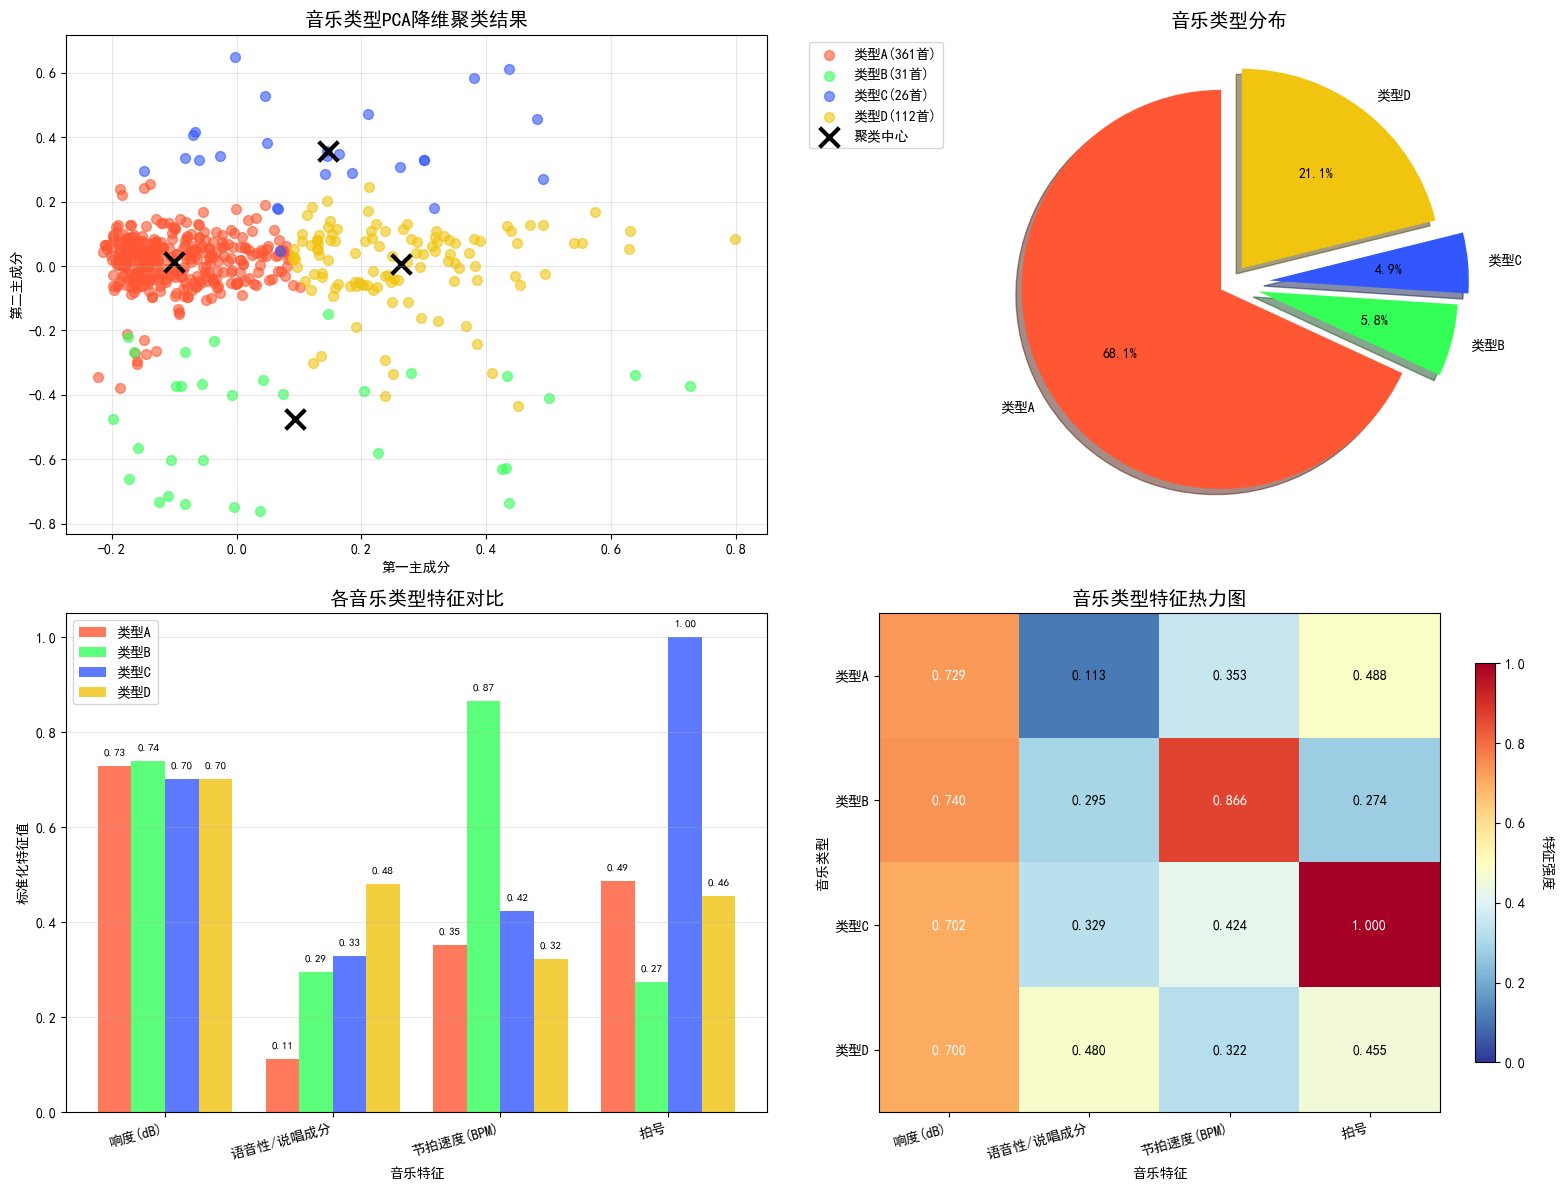

In [22]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
# 定义实际的特征名称
feature_names_actual = ['响度(dB)', '语音性/说唱成分', '节拍速度(BPM)', '拍号']
# 创建2x2的子图布局
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
# 定义聚类颜色和标签
colors = ['#FF5733', '#33FF57', '#3357FF', '#F1C40F']
cluster_labels = ['类型A', '类型B', '类型C', '类型D']
# 1. PCA降维后的聚类结果
pca = PCA(n_components=2)
music_features_2d = pca.fit_transform(music_features)
cluster_centers_2d = pca.transform(kmeans.cluster_centers_)

ax1 = axes[0, 0]
for i in range(4):
    cluster_mask = labels == i
    ax1.scatter(music_features_2d[cluster_mask, 0], 
               music_features_2d[cluster_mask, 1],
               c=colors[i], alpha=0.6, s=50, label=f'{cluster_labels[i]}({np.sum(cluster_mask)}首)')
ax1.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1],
           c='black', marker='x', s=200, linewidths=3, label='聚类中心')
ax1.set_title('音乐类型PCA降维聚类结果', fontsize=14, fontweight='bold')
ax1.set_xlabel('第一主成分')
ax1.set_ylabel('第二主成分')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# 2. 聚类分布饼图
ax2 = axes[0, 1]
cluster_counts = [np.sum(labels == i) for i in range(4)]
sizes = cluster_counts
explode = (0.05, 0.15, 0.2, 0.1)  # 突出显示小聚类

wedges, texts, autotexts = ax2.pie(sizes, labels=cluster_labels, colors=colors, 
                                  autopct='%1.1f%%', startangle=90, explode=explode,
                                  shadow=True, textprops={'fontsize': 10})
ax2.set_title('音乐类型分布', fontsize=14, fontweight='bold')

# 计算各聚类中心
cluster_centers = []
for i in range(4):
    cluster_mask = labels == i
    cluster_center = music_features[cluster_mask].mean(axis=0)
    cluster_centers.append(cluster_center)

# 3. 各聚类音乐特征对比
ax3 = axes[1, 0]
x = np.arange(len(feature_names_actual))
width = 0.2

for i in range(4):
    ax3.bar(x + i*width, cluster_centers[i], 
           width, label=cluster_labels[i], color=colors[i], alpha=0.8)

ax3.set_title('各音乐类型特征对比', fontsize=14, fontweight='bold')
ax3.set_xlabel('音乐特征')
ax3.set_ylabel('标准化特征值')
ax3.set_xticks(x + width * 1.5)
ax3.set_xticklabels(feature_names_actual, rotation=15, ha='right')
ax3.legend(loc='upper left')
ax3.grid(True, alpha=0.3, axis='y')

# 添加数值标注
for i in range(4):
    for j, v in enumerate(cluster_centers[i]):
        ax3.text(j + i*width, v + 0.02, f'{v:.2f}', 
                ha='center', va='bottom', fontsize=8, fontweight='bold')

# 4. 音乐特征热力图
ax4 = axes[1, 1]
cluster_centers_df = np.array(cluster_centers)

# 创建带标注的热力图
im = ax4.imshow(cluster_centers_df, cmap='RdYlBu_r', aspect='auto', vmin=0, vmax=1)

# 添加数值标注
for i in range(len(cluster_centers)):
    for j in range(len(feature_names_actual)):
        value = cluster_centers_df[i, j]
        color = 'white' if value > 0.5 else 'black'
        ax4.text(j, i, f'{value:.3f}', ha="center", va="center", 
                color=color, fontweight='bold', fontsize=10)

ax4.set_title('音乐类型特征热力图', fontsize=14, fontweight='bold')
ax4.set_xlabel('音乐特征')
ax4.set_ylabel('音乐类型')
ax4.set_xticks(range(len(feature_names_actual)))
ax4.set_xticklabels(feature_names_actual, rotation=15, ha='right')
ax4.set_yticks(range(4))
ax4.set_yticklabels(cluster_labels)

# 添加颜色条
cbar = plt.colorbar(im, ax=ax4, shrink=0.8)
cbar.set_label('特征强度', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()


以下从**聚类分布与占比、特征维度剖析、聚类质量与应用价值**三方面，对音乐类型聚类结果做分析：  

### 一、聚类分布：类型A主导，小众类型特征鲜明  
饼图直观呈现音乐类型占比：  
- **类型A（聚类0）** 以 **361个样本、68.1%占比** 绝对主导，是平台最热门音乐类型基础盘，歌曲数量最多。  
- **类型D（聚类3）** 占21.1%，属第二梯队；类型B（聚类1，5.8%）、类型C（聚类2，4.9%）为小众类型，样本量少但特征独特，是差异化内容补充。  

这种分布反映平台音乐生态：大众偏好集中（类型A），同时存在细分需求（小众类型），运营可侧重“主流维稳 + 小众挖掘”。  


### 二、特征维度：四大特征刻画音乐类型差异  
结合**柱状图、热力图、聚类中心值**，从**响度、语音性、节拍速度、拍号** 4维度，拆解各类型核心特征：  

#### 1. 响度（特征0）：各类型差异小，类型A/B稍突出  
- 聚类0（类型A）特征值 **0.729**，聚类1（类型B）**0.740** ，均略高于均值（结合聚类分析，类型A“特征0高于均值0.007” 、类型B“特征0 0.740接近均值” ），说明两类音乐整体响度偏强，更易抓住用户听觉注意力（如流行音乐常靠响度营造氛围）。  
- 类型C（聚类2，0.702）、类型D（聚类3，0.700）响度稍弱，可能偏向轻音乐、氛围音乐等“低刺激”风格，满足用户放松、专注场景需求。  


#### 2. 语音性/视频成分（特征1）：小众类型“内容融合性”差异大  
- **类型D（聚类3）特征值0.480**，显著高于均值（“特征1高于平均值0.269” ），说明音乐中语音、视频元素占比高，可能是**影视OST、带念白的叙事音乐**，依赖内容联动增强沉浸感（如游戏配乐、广播剧插曲 ）。  
- **类型A（聚类0）特征值0.113**，远低于均值（“特征1低于平均值0.099” ），更接近“纯音乐”或“语音占比极低的歌曲”，适配短视频BGM、纯享听歌场景，通用性强。  
- 类型B（0.295）、类型C（0.329）处于中间值，语音/视频成分适中，可能是常规流行歌（含人声演唱，但不过度依赖旁白/剧情 ）。  


#### 3. 节拍速度（特征2）：类型B节奏最突出，类型D偏舒缓  
- **类型B（聚类1）特征值0.866**，大幅高于均值（“特征2高于平均值0.487” ），节奏快、律动感强，契合**舞曲、电子音乐** 场景，适合运动、派对等强节奏需求。  
- **类型D（聚类3）特征值0.322**，低于均值（“特征2低于平均值0.058” ），节奏偏慢，可能是民谣、古典音乐等“慢节奏叙事”风格，匹配休闲、冥想等低动态场景。  
- 类型A（0.353）、类型C（0.424）节奏中等，覆盖大众日常听歌习惯（如流行、摇滚常规节奏 ）。  


#### 4. 拍号（特征3）：类型C“节拍规则性”独特  
- **类型C（聚类2）特征值1.000**，远高于均值（“特征3高于平均值0.507” ），拍号特征极端化，可能是**古典音乐、爵士乐** 等对节拍结构要求高的类型（如古典乐多4/4、3/4拍，爵士乐常含复杂拍号变化 ），音乐专业性、艺术性突出。  
- **类型B（聚类1）特征值0.274**，低于均值（“特征3低于平均值0.219” ），拍号规则性弱，可能偏向自由节奏（如部分实验音乐、即兴创作 ），追求打破常规的听觉体验。  
- 类型A（0.488）、类型D（0.455）拍号特征常规，符合大众对“流行音乐节拍”的认知（如4/4拍主导 ）。  


### 三、聚类质量与应用：有区分度但需优化，可支撑内容运营  
- **聚类质量**：轮廓系数 **0.417** 说明聚类有一定区分度（值越接近1，类内相似度、类间差异度越高 ），但仍有优化空间（如小众类型样本量少，可能导致特征聚合不精准 ）。  
- **应用价值**：  
  - **内容推荐**：基于特征标签，给用户精准推送（如给“运动爱好者”推类型B快节奏音乐，给“专注办公”用户推类型D舒缓音乐 ）。  
  - **运营策略**：类型A主打“全民覆盖”（如首页banner、热门歌单 ）；小众类型（B/C/D）做“细分场景运营”（如专题企划、社群运营 ），挖掘垂直用户价值。  
  - **内容生产**：创作者可参考特征，针对性制作（如想做“影视联动音乐”，强化特征1；想做“舞曲”，强化特征2 ）。  


**总结**：该平台音乐类型呈“大众主导 + 小众细分”格局，4大特征清晰刻画类型差异。运营可围绕“主流维稳、小众深耕”策略，用特征标签优化推荐、内容生产，提升用户听歌匹配度与平台内容丰富度，后续可补充小众类型数据、优化聚类算法，进一步挖掘细分场景价值 。

考虑到对于音乐风格进行聚类是否对标歌手风格，此处我们选择不进行对标。原因主要有以下几点
1. 数据集本身没有提供歌曲风格的信息，歌手主要流派并不能代表歌曲风格，仅仅可以说明歌手擅长或者在次风格上知名。
2. 本数据集中，歌手主要流派有19种,且分布过于集中于afro dancehall等几个流派，其他流派的数据量较少，无法进行有效的聚类从而找到划分依据。解释性差。
3. 这里只讨论对歌曲从四个基本的音乐构成特征进行聚类，目的是从音乐的技法对音乐进行新的分类，不涉及歌手。